In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [24]:
file_name =  "./../2ndset/IMG_1485.JPG"
image = cv2.imread(file_name)
image = image[900:3500,500:2300,:]
#image = image[900:3500,500:2300,:]
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#twoims = np.concatenate((image, gray_image), axis=1)
cv2.imshow("col", image)
#cv2.imshow("bw", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("col", gray_image)
#cv2.imshow("bw", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
gray_image.shape

(2600, 1800)

In [38]:
small_image = gray_image[0:400,0:400]
cv2.imshow("col", small_image)
#cv2.imshow("bw", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

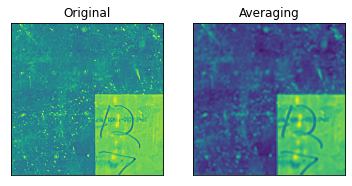

In [39]:
kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(small_image,-1,kernel)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(small_image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
mask = cv2.inRange(dst, 190, 255)
cv2.imshow("col", mask)
#cv2.imshow("bw", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

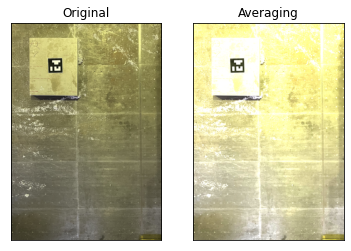

In [23]:
kernel = np.ones((7,7),np.float32)/25
dst = cv2.filter2D(image,-1,kernel)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (5,5), 0) 
cv2.imshow("col", img_blur)
#cv2.imshow("bw", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

In [27]:
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
im2 =  image[1300:2700,500:2000,:]
print(im2.shape)
cv2.imshow("col", im2)
cv2.waitKey(0)
cv2.destroyAllWindows()


(1400, 1500, 3)


In [6]:
im3 =  im2[278:500,1100:1400,:]
print(im3.shape)
cv2.imshow("col", im3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(222, 300, 3)


In [7]:
alum = im3[:,0:110,:]
wood = im3[:,170:,:]
cv2.imshow("col", alum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
print(np.mean(alum[:,:,0]),"-----",np.mean(wood[:,:,0]))
print(np.std(alum[:,:,0]),"-----",np.std(wood[:,:,0]))
print(np.mean(alum[:,:,1]),"-----",np.mean(wood[:,:,1]))
print(np.std(alum[:,:,1]),"-----",np.std(wood[:,:,1]))
print(np.mean(alum[:,:,2]),"-----",np.mean(wood[:,:,2]))
print(np.std(alum[:,:,2]),"-----",np.std(wood[:,:,2]))

157.31830466830468 ----- 125.06514206514207
20.89539762739861 ----- 17.84356401082388
119.13951678951679 ----- 151.92543312543313
20.73171482147358 ----- 18.66394600639581
87.7564701064701 ----- 166.07969507969509
20.185901705668037 ----- 18.351855478158694


In [24]:
hsvalum = cv2.cvtColor(alum, cv2.COLOR_BGR2HSV)
hsvwood = cv2.cvtColor(wood, cv2.COLOR_BGR2HSV)
print("mean val for alum H:",np.mean(hsvalum[:,:,0]))
print("mean val for wood H:",np.mean(hsvwood[:,:,0]))


lower_red = np.array([75,100,120])
upper_red = np.array([140,140,180])

# create a red HSV colour boundary and 
# threshold HSV image
mask = cv2.inRange(hsvimage, lower_red, upper_red)

cv2.imshow('Grayscale', alum)
cv2.waitKey(0)  
  
# Window shown waits for any key pressing event
cv2.destroyAllWindows()

mean val for alum H: 106.62362817362818
mean val for wood H: 19.67969507969508


In [23]:
print("mean val for alum V:",np.mean(hsvalum[:,:,2]))
print("mean val for wood V:",np.mean(hsvwood[:,:,2]))

mean val for alum V: 157.31830466830468
mean val for wood V: 166.07969507969509


In [ ]:
green = np.uint8([[[157,120,88]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("HSV for Alum", hsv_green)

green = np.uint8([[[125,152,166]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("HSV for Wood", hsv_green)

In [11]:
# define range of red color in HSV
hsvimage = cv2.cvtColor(im2,cv2.COLOR_BGR2HSV)

lower_red = np.array([75,80,120])
upper_red = np.array([140,140,180])

# create a red HSV colour boundary and 
# threshold HSV image
mask = cv2.inRange(hsvimage, lower_red, upper_red)
res = cv2.bitwise_and(im2,im2, mask= mask)

# Bitwise-AND mask and original image
#res = cv2.bitwise_and(image,frame, mask= mask)

cv2.imshow('Grayscale', mask)
cv2.waitKey(0)  
  
# Window shown waits for any key pressing event
cv2.destroyAllWindows()

In [ ]:
np.where(mask==255)

In [21]:
for i in range(mask.shape[0]):
    if len(np.where(mask[i]==255)[0])>1:
        jmax = np.max(np.where(mask[i]==255))
        jmin = np.min(np.where(mask[i]==255))
        print(i, "---" ,jmax-jmin)
    #elif len(np.where(mask[i]==255))==1:
        
    #    jmax = np.where(mask[i]==255)
    #    print("case of 1", jmax)

142 --- 1
143 --- 12
144 --- 44
145 --- 45
146 --- 68
147 --- 72
148 --- 84
149 --- 90
150 --- 112
151 --- 113
152 --- 130
153 --- 132
154 --- 153
155 --- 162
156 --- 180
157 --- 181
158 --- 211
159 --- 212
160 --- 238
161 --- 241
162 --- 260
163 --- 260
164 --- 278
165 --- 288
166 --- 304
167 --- 301
168 --- 314
169 --- 315
170 --- 351
171 --- 351
172 --- 375
173 --- 376
174 --- 393
175 --- 392
176 --- 420
177 --- 419
178 --- 444
179 --- 442
180 --- 477
181 --- 477
182 --- 492
183 --- 492
184 --- 515
185 --- 524
186 --- 531
187 --- 544
188 --- 544
189 --- 531
190 --- 559
191 --- 569
192 --- 580
193 --- 594
194 --- 552
195 --- 552
196 --- 617
197 --- 618
198 --- 630
199 --- 626
200 --- 677
201 --- 682
202 --- 695
203 --- 703
204 --- 735
205 --- 736
206 --- 752
207 --- 711
208 --- 782
209 --- 794
210 --- 772
211 --- 759
212 --- 802
213 --- 802
214 --- 815
215 --- 817
216 --- 814
217 --- 820
218 --- 833
219 --- 823
220 --- 828
221 --- 828
222 --- 823
223 --- 822
224 --- 833
225 --- 842
2

In [ ]:
saca foto
mide codigo_id (por barras)
mide dimensiones
carga en planilla excel (id, dimension 1, dimension 2)

In [ ]:
i = 265
#len(np.where(mask[i]==255))>1
len(np.where(mask[i]==255)[0])